In [12]:
import intake

In [13]:
col_url = "/Users/ar46/Desktop/catalogs/gfdl-cmip6.json" 

In [14]:
col = intake.open_esm_datastore(col_url)

In [15]:
col.df

,product_id,institute,model,experiment,frequency,modeling_realm,mip_table,ensemble_member,variable,temporal_subset,version,path
0,output,NOAA-GFDL,GFDL-ESM4,histSST,mon,atmos,Amon,r1i1p1,rlut,196101-200512,v20180701,/Users/ar46/data_cmip6/CMIP6/AerChemMIP/NOAA-G...
1,output,NOAA-GFDL,GFDL-ESM4,histSST,mon,atmos,Amon,r1i1p1,rlut,196101-200512,v20180701,/Users/ar46/data_cmip6/CMIP6/AerChemMIP/NOAA-G...
2,output,NOAA-GFDL,GFDL-ESM4,historical,mon,atmos,Amon,r1i1p1,tas,195001-201412,v20190726,s3://gfdl-esgf/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...


In [34]:
print(col.key_template)

product_id.institute.model.modeling_realm.experiment.frequency.mip_table


In [17]:
expname_filter = ['histSST']
table_id_filter = 'Amon'
model_filter = 'GFDL-ESM4'
variable_id_filter = "rlut"

In [18]:
cat = col.search(experiment=expname_filter, mip_table=table_id_filter,model=model_filter)

In [19]:
cat

,unique
product_id,1
institute,1
model,1
experiment,1
frequency,1
modeling_realm,1
mip_table,1
ensemble_member,1
variable,1
temporal_subset,1


In [20]:
cat.df.head()


,product_id,institute,model,experiment,frequency,modeling_realm,mip_table,ensemble_member,variable,temporal_subset,version,path
0,output,NOAA-GFDL,GFDL-ESM4,histSST,mon,atmos,Amon,r1i1p1,rlut,196101-200512,v20180701,/Users/ar46/data_cmip6/CMIP6/AerChemMIP/NOAA-G...
1,output,NOAA-GFDL,GFDL-ESM4,histSST,mon,atmos,Amon,r1i1p1,rlut,196101-200512,v20180701,/Users/ar46/data_cmip6/CMIP6/AerChemMIP/NOAA-G...


In [23]:
data_source = col["output.NOAA-GFDL.GFDL-ESM4.atmos.histSST.mon.Amon"]

In [24]:
print(type(data_source))
print(data_source)

<class 'intake_esm.source.ESMGroupDataSource'>
<name: output.NOAA-GFDL.GFDL-ESM4.atmos.histSST.mon.Amon, assets: 2


In [32]:
ds = data_source() #zarr_kwargs={'consolidated': True, 'decode_times': True}).to_dask()
ds['rlut','r1i1p1','196101-200512']

TypeError: 'ESMGroupDataSource' object is not subscriptable

In [25]:
pip install netcdf4

     |████████████████████████████████| 6.4 MB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
ds.rlut

<xarray.DataArray 'rlut' (ensemble_member: 1, time: 780, lat: 180, lon: 288)>
dask.array<broadcast_to, shape=(1, 780, 180, 288), dtype=float32, chunksize=(1, 780, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat              (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time             (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon              (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * ensemble_member  (ensemble_member) <U6 'r1i1p1'
Attributes:
    long_name:      TOA Outgoing Longwave Radiation
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  toa_outgoing_longwave_flux
    interp_method:  conserve_order2
    original_name:  rlut

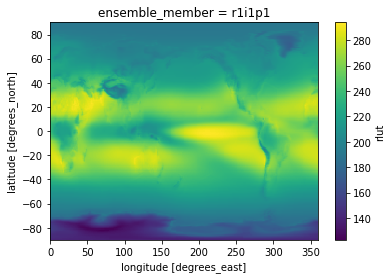

In [18]:
rlut_mean = ds.rlut.mean(dim=['time'])
rlut_mean.plot(cmap='viridis') #gist_ncar

In [30]:
import cartopy.crs as ccrs

In [32]:
rlut=ds.rlut

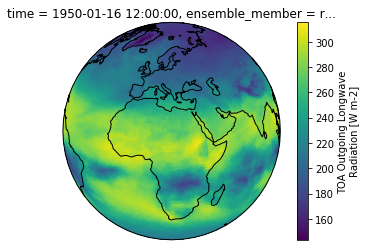

In [33]:
p = rlut.isel(time=0).plot(subplot_kws=dict(projection=ccrs.Orthographic(20, 20), facecolor="gray"),transform=ccrs.PlateCarree())
p.axes.set_global()
p.axes.coastlines()

In [19]:
ds.rlut

<xarray.DataArray 'rlut' (ensemble_member: 1, time: 780, lat: 180, lon: 288)>
dask.array<broadcast_to, shape=(1, 780, 180, 288), dtype=float32, chunksize=(1, 780, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat              (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time             (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon              (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * ensemble_member  (ensemble_member) <U6 'r1i1p1'
Attributes:
    long_name:      TOA Outgoing Longwave Radiation
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  toa_outgoing_longwave_flux
    interp_method:  conserve_order2
    original_name:  rlut

In [27]:
lats = 70 #70N-90N, 
late = 89.5 

In [30]:
dsregionbox = ds.rlut.sel(lat=slice(lats, late))


In [32]:
dsregionbox

<xarray.DataArray 'rlut' (ensemble_member: 1, time: 780, lat: 20, lon: 288)>
dask.array<getitem, shape=(1, 780, 20, 288), dtype=float32, chunksize=(1, 780, 20, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat              (lat) float64 70.5 71.5 72.5 73.5 ... 86.5 87.5 88.5 89.5
  * time             (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon              (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * ensemble_member  (ensemble_member) <U6 'r1i1p1'
Attributes:
    long_name:      TOA Outgoing Longwave Radiation
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  toa_outgoing_longwave_flux
    interp_method:  conserve_order2
    original_name:  rlut